# 🐟 NilaSense - Model Klasifikasi Kualitas Air untuk Budidaya Ikan Nila

## 📋 Deskripsi Project
Model Machine Learning untuk mengklasifikasikan kualitas air kolam ikan nila berdasarkan 4 parameter sensor IoT:
- **pH** - Tingkat keasaman/basa air
- **Suhu (Temperature)** - Suhu air dalam °C
- **Kekeruhan (Turbidity)** - Tingkat kekeruhan dalam NTU
- **Oksigen Terlarut (Dissolved Oxygen)** - Kadar oksigen dalam mg/L

## 🎯 Target Klasifikasi
- **Baik** - Kondisi optimal untuk pertumbuhan ikan nila
- **Normal** - Kondisi masih layak namun perlu monitoring
- **Perlu Perhatian** - Kondisi berbahaya, perlu tindakan segera

## 🔧 Metode
**Random Forest Classifier** - Ensemble learning method yang robust dan akurat

---

**Tim Pengembang:**
- Ahmad Faris AL Aziz (J0404231081)
- Bramantyo Wicaksono (J0404231053)
- M Faza Elrahman (J0404231155)


## 1. Import Libraries


In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Model persistence
import joblib
import pickle
from datetime import datetime
import os

print("✅ All libraries imported successfully!")
print(f"📅 Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ All libraries imported successfully!
📅 Training Date: 2025-10-29 00:00:15


## 2. Load Dataset


In [2]:
# Load dataset
df = pd.read_csv('Water_Quality_Dataset.csv')

print("📊 Dataset Overview:")
print("=" * 60)
print(f"✓ Total Records: {len(df):,}")
print(f"✓ Total Features: {df.shape[1]}")
print(f"✓ Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "=" * 60)
print("\n🔍 First 5 rows:")
df.head()


📊 Dataset Overview:
✓ Total Records: 1,000
✓ Total Features: 11
✓ Memory Usage: 0.20 MB


🔍 First 5 rows:


,Timestamp,Location,pH,Turbidity (NTU),Temperature (°C),DO (mg/L),BOD (mg/L),Lead (mg/L),Mercury (mg/L),Arsenic (mg/L),Pollution_Level
0,2024-01-01 00:00:00,L4,8.762414,14.468306,16.461631,6.258335,2.478582,0.002801,0.001924,0.018769,2
1,2024-01-01 01:00:00,L5,7.477966,1.905645,27.446865,2.826120,8.048453,0.019551,0.000633,0.003708,2
2,2024-01-01 02:00:00,L3,7.938278,1.889506,34.623557,3.380191,2.102481,0.019291,0.000205,0.005055,2
3,2024-01-01 03:00:00,L5,8.728748,0.736115,18.802153,6.543794,6.714160,0.003358,0.001058,0.005638,2
4,2024-01-01 04:00:00,L5,7.975335,19.151777,30.851902,4.370861,2.114614,0.006059,0.000124,0.001237,2


In [3]:
# Dataset information
print("📋 Dataset Information:")
print("=" * 60)
df.info()
print("\n" + "=" * 60)
print("\n📈 Statistical Summary:")
df.describe()


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Location          1000 non-null   object 
 2   pH                1000 non-null   float64
 3   Turbidity (NTU)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   DO (mg/L)         1000 non-null   float64
 6   BOD (mg/L)        1000 non-null   float64
 7   Lead (mg/L)       1000 non-null   float64
 8   Mercury (mg/L)    1000 non-null   float64
 9   Arsenic (mg/L)    1000 non-null   float64
 10  Pollution_Level   1000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 86.1+ KB


📈 Statistical Summary:


,pH,Turbidity (NTU),Temperature (°C),DO (mg/L),BOD (mg/L),Lead (mg/L),Mercury (mg/L),Arsenic (mg/L),Pollution_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.250855,10.218681,24.966871,5.928647,5.482985,0.009965,0.000981,0.009855,1.909000
std,1.024515,5.631584,5.756625,2.287483,2.604094,0.005746,0.000569,0.005544,0.307919
min,5.516212,0.502627,15.000233,2.000246,1.008491,0.000128,0.000010,0.000505,0.000000
25%,6.324944,5.566377,19.950098,3.984953,3.242944,0.005000,0.000489,0.005015,2.000000
50%,7.265239,10.236904,25.041492,5.871292,5.368891,0.009894,0.000977,0.009392,2.000000
75%,8.107655,15.148932,29.967260,7.841829,7.730134,0.015130,0.001444,0.014484,2.000000
max,8.997948,19.967776,34.991154,9.981995,9.994153,0.019989,0.001998,0.019922,2.000000


In [4]:
# Check missing values
print("🔍 Missing Values Check:")
print("=" * 60)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])
    
print("\n" + "=" * 60)
print("\n📊 Pollution Level Distribution:")
print(df['Pollution_Level'].value_counts().sort_index())
print("\nPercentage:")
print(df['Pollution_Level'].value_counts(normalize=True).sort_index() * 100)


🔍 Missing Values Check:
✅ No missing values found!


📊 Pollution Level Distribution:
0      6
1     79
2    915
Name: Pollution_Level, dtype: int64

Percentage:
0     0.6
1     7.9
2    91.5
Name: Pollution_Level, dtype: float64


## 3. Exploratory Data Analysis (EDA)


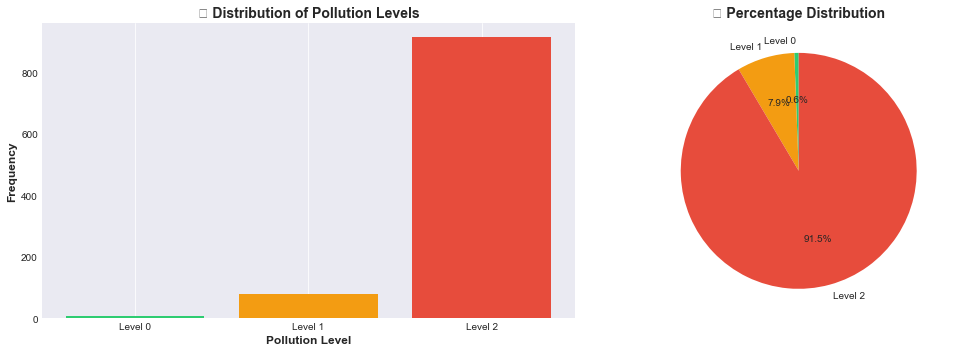


💡 Interpretation:
Level 0: Will be mapped to 'Baik' (Good)
Level 1: Will be mapped to 'Normal' (Normal)
Level 2: Will be mapped to 'Perlu Perhatian' (Needs Attention)


In [5]:
# Visualisasi distribusi Pollution Level
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
pollution_counts = df['Pollution_Level'].value_counts().sort_index()
axes[0].bar(pollution_counts.index, pollution_counts.values, color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_xlabel('Pollution Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('📊 Distribution of Pollution Levels', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Level 0', 'Level 1', 'Level 2'])
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[1].pie(pollution_counts.values, labels=['Level 0', 'Level 1', 'Level 2'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('📈 Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("Level 0: Will be mapped to 'Baik' (Good)")
print("Level 1: Will be mapped to 'Normal' (Normal)")
print("Level 2: Will be mapped to 'Perlu Perhatian' (Needs Attention)")


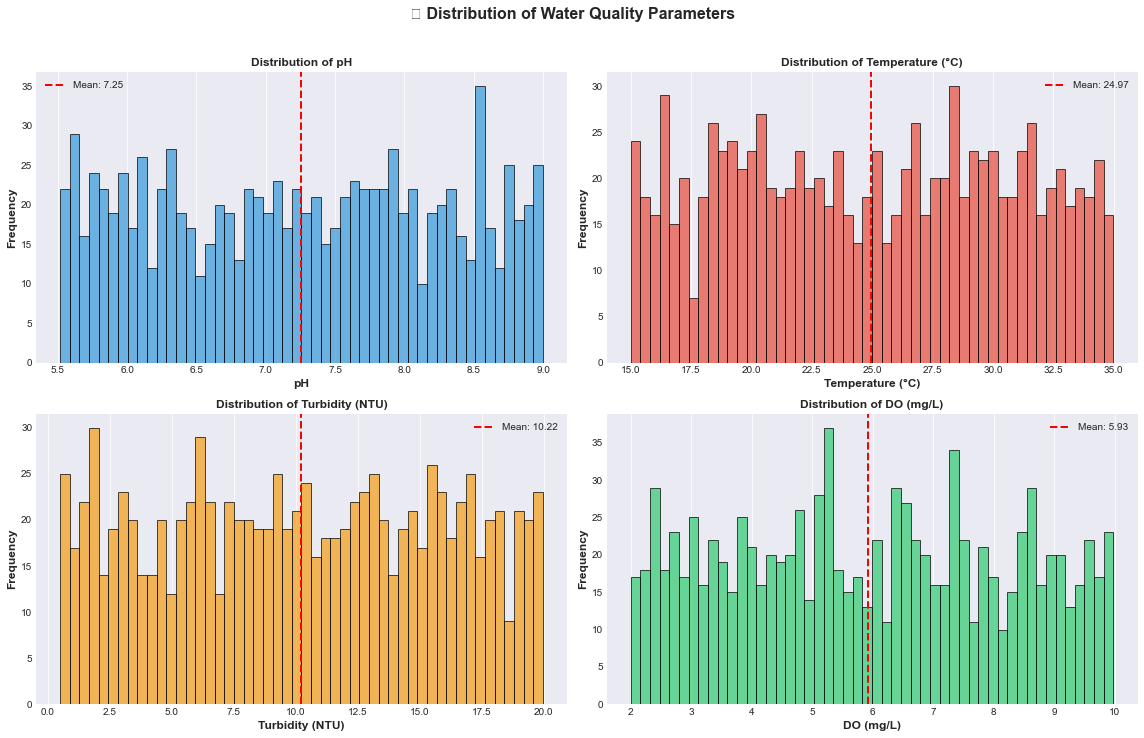

In [6]:
# Visualisasi distribusi 4 parameter utama
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('🔬 Distribution of Water Quality Parameters', fontsize=16, fontweight='bold', y=1.02)

parameters = ['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'DO (mg/L)']
colors_params = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

for idx, (param, color) in enumerate(zip(parameters, colors_params)):
    row = idx // 2
    col = idx % 2
    
    # Histogram with KDE
    axes[row, col].hist(df[param], bins=50, alpha=0.7, color=color, edgecolor='black')
    axes[row, col].set_xlabel(param, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[row, col].set_title(f'Distribution of {param}', fontsize=12, fontweight='bold')
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df[param].mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()


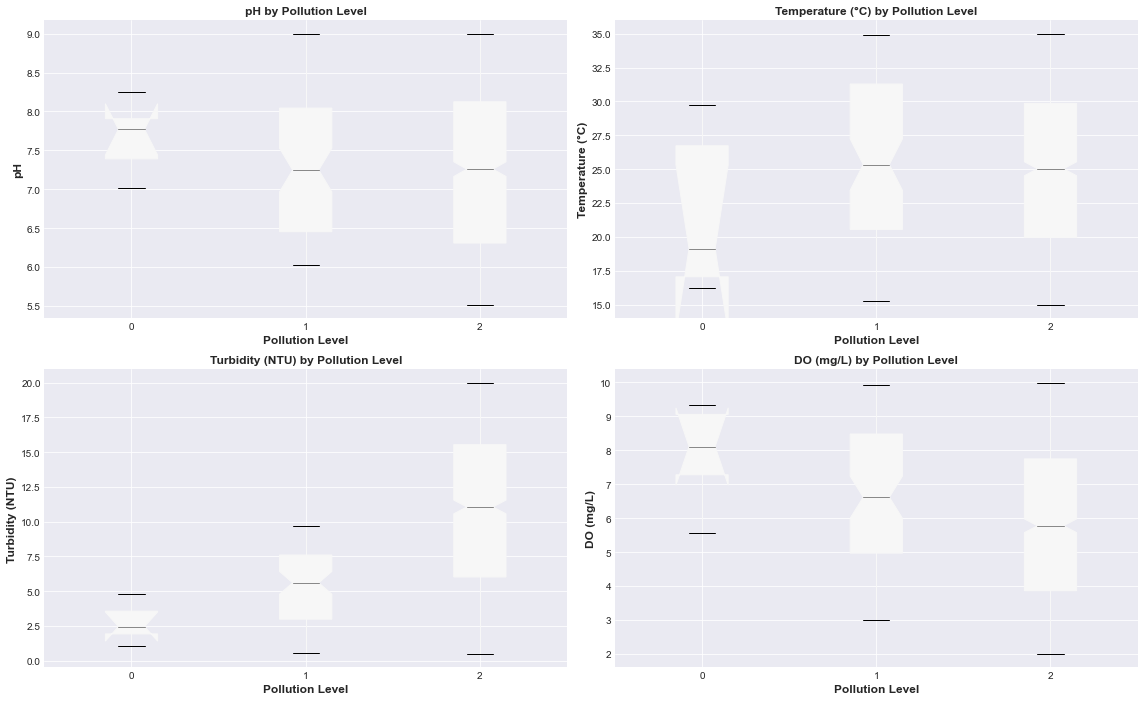


💡 Insight: Boxplot menunjukkan distribusi setiap parameter berdasarkan level polusi
   - Outliers ditunjukkan dengan titik-titik di luar whisker
   - Notch menunjukkan confidence interval untuk median


In [7]:
# Boxplot untuk melihat outliers dan distribusi per pollution level
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📊 Parameter Distribution by Pollution Level', fontsize=16, fontweight='bold', y=1.02)

for idx, param in enumerate(parameters):
    row = idx // 2
    col = idx % 2
    
    df.boxplot(column=param, by='Pollution_Level', ax=axes[row, col], 
               patch_artist=True, notch=True)
    axes[row, col].set_xlabel('Pollution Level', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(param, fontsize=12, fontweight='bold')
    axes[row, col].set_title(f'{param} by Pollution Level', fontsize=12, fontweight='bold')
    axes[row, col].get_figure().suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

print("\n💡 Insight: Boxplot menunjukkan distribusi setiap parameter berdasarkan level polusi")
print("   - Outliers ditunjukkan dengan titik-titik di luar whisker")
print("   - Notch menunjukkan confidence interval untuk median")


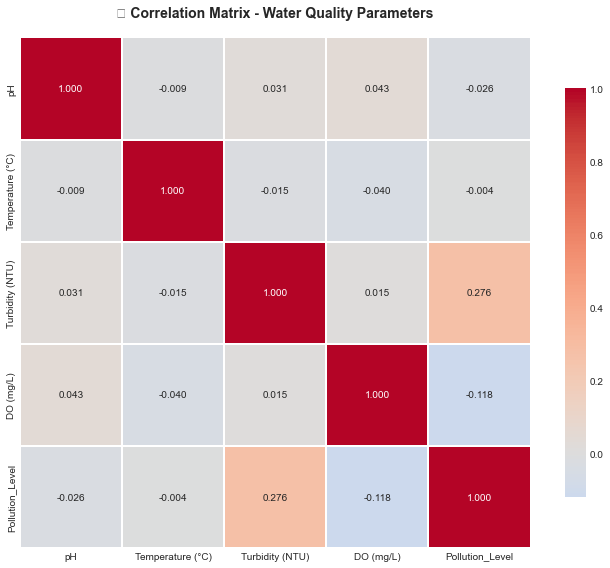


💡 Correlation Insights:
   pH                        → Pollution Level: -0.026
   Temperature (°C)          → Pollution Level: -0.004
   Turbidity (NTU)           → Pollution Level: +0.276
   DO (mg/L)                 → Pollution Level: -0.118


In [8]:
# Correlation matrix untuk 4 parameter utama
features_selected = ['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'DO (mg/L)', 'Pollution_Level']
correlation_matrix = df[features_selected].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=1, square=True, cbar_kws={"shrink": 0.8})
plt.title('🔥 Correlation Matrix - Water Quality Parameters', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Correlation Insights:")
print("=" * 60)
for i in range(len(features_selected)-1):
    corr_with_target = correlation_matrix.iloc[i, -1]
    param = features_selected[i]
    print(f"   {param:25s} → Pollution Level: {corr_with_target:+.3f}")
print("=" * 60)


## 4. Data Preprocessing & Feature Engineering


In [9]:
# Pilih hanya 4 parameter yang diperlukan + target
print("🎯 Feature Selection: Selecting 4 Key Parameters")
print("=" * 60)

# Rename columns untuk konsistensi dengan API backend
df_model = df[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'DO (mg/L)', 'Pollution_Level']].copy()
df_model.columns = ['ph', 'temperature', 'turbidity', 'dissolved_oxygen', 'quality_label']

print("✅ Selected Features:")
for i, col in enumerate(df_model.columns[:-1], 1):
    print(f"   {i}. {col}")
    
print(f"\n✅ Target Variable: {df_model.columns[-1]}")
print("=" * 60)
print("\n🔍 Preview of processed data:")
df_model.head(10)


🎯 Feature Selection: Selecting 4 Key Parameters
✅ Selected Features:
   1. ph
   2. temperature
   3. turbidity
   4. dissolved_oxygen

✅ Target Variable: quality_label

🔍 Preview of processed data:


,ph,temperature,turbidity,dissolved_oxygen,quality_label
0,8.762414,16.461631,14.468306,6.258335,2
1,7.477966,27.446865,1.905645,2.826120,2
2,7.938278,34.623557,1.889506,3.380191,2
3,8.728748,18.802153,0.736115,6.543794,2
4,7.975335,30.851902,19.151777,4.370861,2
5,6.033887,33.157976,14.881413,9.506526,2
6,7.517009,33.874032,7.388402,8.549922,2
7,7.623503,34.202712,6.282444,9.868538,2
8,6.984457,25.429193,7.319213,4.077367,2
9,8.077555,34.546158,15.605744,9.757789,2


In [10]:
# Label Mapping: 0, 1, 2 → Baik, Normal, Perlu Perhatian
print("🏷️  Label Mapping Process")
print("=" * 60)

# Definisi mapping
# Berdasarkan analisis data: Level 0 = paling baik, Level 2 = paling buruk
label_mapping = {
    0: 'Baik',              # Kualitas air optimal
    1: 'Normal',            # Kualitas air cukup baik, perlu monitoring
    2: 'Perlu Perhatian'    # Kualitas air buruk, perlu tindakan
}

# Reverse mapping untuk encoding
label_encoding = {v: k for k, v in label_mapping.items()}

print("📋 Mapping Definition:")
for numeric, text in label_mapping.items():
    count = (df_model['quality_label'] == numeric).sum()
    percentage = (count / len(df_model)) * 100
    print(f"   {numeric} → '{text:20s}' | Count: {count:4d} ({percentage:5.2f}%)")

# Buat kolom baru dengan label text
df_model['quality_text'] = df_model['quality_label'].map(label_mapping)

print("\n" + "=" * 60)
print("✅ Label mapping completed!")
print(f"\n🔍 Sample of labeled data:")
df_model[['ph', 'temperature', 'turbidity', 'dissolved_oxygen', 'quality_label', 'quality_text']].head(10)


🏷️  Label Mapping Process
📋 Mapping Definition:
   0 → 'Baik                ' | Count:    6 ( 0.60%)
   1 → 'Normal              ' | Count:   79 ( 7.90%)
   2 → 'Perlu Perhatian     ' | Count:  915 (91.50%)

✅ Label mapping completed!

🔍 Sample of labeled data:


,ph,temperature,turbidity,dissolved_oxygen,quality_label,quality_text
0,8.762414,16.461631,14.468306,6.258335,2,Perlu Perhatian
1,7.477966,27.446865,1.905645,2.826120,2,Perlu Perhatian
2,7.938278,34.623557,1.889506,3.380191,2,Perlu Perhatian
3,8.728748,18.802153,0.736115,6.543794,2,Perlu Perhatian
4,7.975335,30.851902,19.151777,4.370861,2,Perlu Perhatian
5,6.033887,33.157976,14.881413,9.506526,2,Perlu Perhatian
6,7.517009,33.874032,7.388402,8.549922,2,Perlu Perhatian
7,7.623503,34.202712,6.282444,9.868538,2,Perlu Perhatian
8,6.984457,25.429193,7.319213,4.077367,2,Perlu Perhatian
9,8.077555,34.546158,15.605744,9.757789,2,Perlu Perhatian


In [11]:
# Statistik deskriptif untuk setiap kelas
print("📊 Descriptive Statistics by Water Quality Class")
print("=" * 80)

for label_num, label_text in label_mapping.items():
    print(f"\n{'='*80}")
    print(f"🔹 Class: {label_text.upper()} (Level {label_num})")
    print(f"{'='*80}")
    
    subset = df_model[df_model['quality_label'] == label_num]
    print(f"Total samples: {len(subset):,}\n")
    
    stats = subset[['ph', 'temperature', 'turbidity', 'dissolved_oxygen']].describe()
    print(stats.round(2))
    
print("\n" + "=" * 80)


📊 Descriptive Statistics by Water Quality Class

🔹 Class: BAIK (Level 0)
Total samples: 6

         ph  temperature  turbidity  dissolved_oxygen
count  6.00         6.00       6.00              6.00
mean   7.67        21.64       2.74              7.91
std    0.45         6.12       1.39              1.44
min    7.01        16.24       1.03              5.55
25%    7.39        17.05       1.93              7.28
50%    7.77        19.13       2.46              8.11
75%    7.91        26.72       3.57              9.06
max    8.25        29.73       4.80              9.32

🔹 Class: NORMAL (Level 1)
Total samples: 79

          ph  temperature  turbidity  dissolved_oxygen
count  79.00        79.00      79.00             79.00
mean    7.29        25.57       5.30              6.68
std     0.92         6.01       2.76              2.00
min     6.02        15.29       0.59              3.01
25%     6.45        20.54       2.99              4.97
50%     7.25        25.33       5.60           

## 5. Prepare Data for Training


In [12]:
# Pisahkan features (X) dan target (y)
print("📦 Preparing Features and Target")
print("=" * 60)

X = df_model[['ph', 'temperature', 'turbidity', 'dissolved_oxygen']].values
y = df_model['quality_label'].values

print(f"✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")
print(f"\n📊 Target distribution:")
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"   Class {label} ({label_mapping[label]:20s}): {count:4d} samples")
print("=" * 60)


📦 Preparing Features and Target
✅ Features (X) shape: (1000, 4)
✅ Target (y) shape: (1000,)

📊 Target distribution:
   Class 0 (Baik                ):    6 samples
   Class 1 (Normal              ):   79 samples
   Class 2 (Perlu Perhatian     ):  915 samples


In [13]:
# Split data: 80% training, 20% testing
from sklearn.model_selection import train_test_split

print("✂️  Splitting Data into Train and Test Sets")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Memastikan distribusi kelas seimbang
)

print(f"✅ Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Testing set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n📊 Training set class distribution:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, counts_train):
    print(f"   Class {label} ({label_mapping[label]:20s}): {count:4d} samples ({count/len(y_train)*100:.1f}%)")

print(f"\n📊 Testing set class distribution:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, counts_test):
    print(f"   Class {label} ({label_mapping[label]:20s}): {count:4d} samples ({count/len(y_test)*100:.1f}%)")
    
print("=" * 60)


✂️  Splitting Data into Train and Test Sets
✅ Training set: 800 samples (80.0%)
✅ Testing set:  200 samples (20.0%)

📊 Training set class distribution:
   Class 0 (Baik                ):    5 samples (0.6%)
   Class 1 (Normal              ):   63 samples (7.9%)
   Class 2 (Perlu Perhatian     ):  732 samples (91.5%)

📊 Testing set class distribution:
   Class 0 (Baik                ):    1 samples (0.5%)
   Class 1 (Normal              ):   16 samples (8.0%)
   Class 2 (Perlu Perhatian     ):  183 samples (91.5%)


In [14]:
# Feature Scaling - Standardization
from sklearn.preprocessing import StandardScaler

print("⚖️  Feature Scaling (Standardization)")
print("=" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler (mean=0, std=1)")
print(f"\n📊 Training set statistics after scaling:")
print(f"   Mean: {X_train_scaled.mean(axis=0)}")
print(f"   Std:  {X_train_scaled.std(axis=0)}")
print("\n" + "=" * 60)

# Simpan feature names untuk referensi
feature_names = ['ph', 'temperature', 'turbidity', 'dissolved_oxygen']
print(f"\n✅ Feature names stored: {feature_names}")


⚖️  Feature Scaling (Standardization)
✅ Features scaled using StandardScaler (mean=0, std=1)

📊 Training set statistics after scaling:
   Mean: [-2.48689958e-15  5.96855898e-15 -1.67463265e-15 -3.95794508e-16]
   Std:  [1. 1. 1. 1.]


✅ Feature names stored: ['ph', 'temperature', 'turbidity', 'dissolved_oxygen']


## 6. Model Training - Random Forest Classifier


In [15]:
# Baseline Random Forest Model
print("🌲 Training Baseline Random Forest Classifier")
print("=" * 60)

# Initialize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Train model
print("\n🚀 Training started...")
rf_baseline.fit(X_train_scaled, y_train)
print("✅ Training completed!")

# Make predictions
y_pred_baseline = rf_baseline.predict(X_test_scaled)
y_pred_proba_baseline = rf_baseline.predict_proba(X_test_scaled)

# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"\n📊 Baseline Model Accuracy: {baseline_accuracy*100:.2f}%")
print("=" * 60)


🌲 Training Baseline Random Forest Classifier

🚀 Training started...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


✅ Training completed!


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished



📊 Baseline Model Accuracy: 91.50%


In [16]:
# Hyperparameter Tuning dengan GridSearchCV
from sklearn.model_selection import GridSearchCV


print("🔧 Hyperparameter Tuning with GridSearchCV")
print("=" * 60)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("📋 Parameter grid:")
for param, values in param_grid.items():
    print(f"   {param:20s}: {values}")

# Initialize GridSearchCV
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

print(f"\n🚀 Starting Grid Search with {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])} combinations...")
print("⏳ This may take several minutes...\n")

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

print("\n✅ Grid Search completed!")
print("=" * 60)


🔧 Hyperparameter Tuning with GridSearchCV
📋 Parameter grid:
   n_estimators        : [100, 200, 300]
   max_depth           : [10, 20, 30, None]
   min_samples_split   : [2, 5, 10]
   min_samples_leaf    : [1, 2, 4]
   max_features        : ['sqrt', 'log2']

🚀 Starting Grid Search with 216 combinations...
⏳ This may take several minutes...

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Grid Search completed!


In [17]:
# Best parameters from GridSearchCV
print("🏆 Best Hyperparameters Found:")
print("=" * 60)

best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"   {param:20s}: {value}")

print(f"\n📊 Best Cross-Validation Score: {grid_search.best_score_*100:.2f}%")
print("=" * 60)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with best model
y_pred = best_rf_model.predict(X_test_scaled)
y_pred_proba = best_rf_model.predict_proba(X_test_scaled)

# Calculate final accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Model Test Accuracy: {final_accuracy*100:.2f}%")
print(f"📈 Improvement over baseline: {(final_accuracy - baseline_accuracy)*100:+.2f}%")
print("=" * 60)


🏆 Best Hyperparameters Found:
   max_depth           : 10
   max_features        : sqrt
   min_samples_leaf    : 4
   min_samples_split   : 2
   n_estimators        : 300

📊 Best Cross-Validation Score: 91.13%

✅ Final Model Test Accuracy: 91.50%
📈 Improvement over baseline: +0.00%


## 7. Model Evaluation


In [18]:
# Classification Report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("📊 Classification Report")
print("=" * 80)

target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

print("=" * 80)

# Calculate individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📈 Overall Metrics:")
print("=" * 60)
print(f"   Accuracy:  {accuracy*100:6.2f}%")
print(f"   Precision: {precision*100:6.2f}%")
print(f"   Recall:    {recall*100:6.2f}%")
print(f"   F1-Score:  {f1*100:6.2f}%")
print("=" * 60)


📊 Classification Report
                 precision    recall  f1-score   support

           Baik     0.0000    0.0000    0.0000         1
         Normal     0.0000    0.0000    0.0000        16
Perlu Perhatian     0.9150    1.0000    0.9556       183

       accuracy                         0.9150       200
      macro avg     0.3050    0.3333    0.3185       200
   weighted avg     0.8372    0.9150    0.8744       200


📈 Overall Metrics:
   Accuracy:   91.50%
   Precision:  83.72%
   Recall:     91.50%
   F1-Score:   87.44%


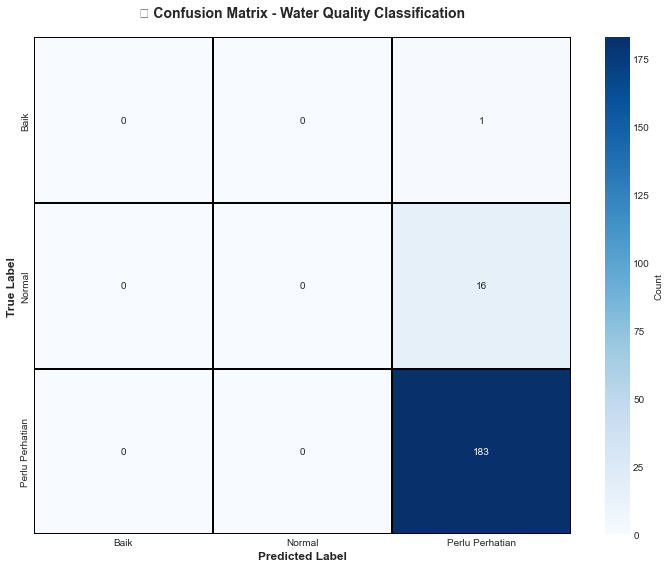


💡 Confusion Matrix Interpretation:
   - Diagonal values: Correct predictions
   - Off-diagonal: Misclassifications


In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names,
            cbar_kws={'label': 'Count'}, linewidths=1, linecolor='black')
plt.title('🎯 Confusion Matrix - Water Quality Classification', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Confusion Matrix Interpretation:")
print("   - Diagonal values: Correct predictions")
print("   - Off-diagonal: Misclassifications")


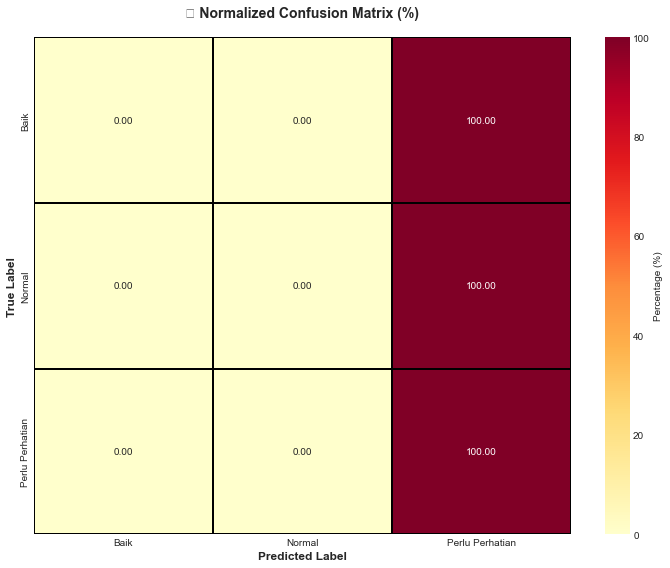


💡 Normalized Confusion Matrix shows percentage of predictions per class


In [20]:
# Normalized Confusion Matrix (Percentage)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=target_names, yticklabels=target_names,
            cbar_kws={'label': 'Percentage (%)'}, linewidths=1, linecolor='black')
plt.title('📊 Normalized Confusion Matrix (%)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Normalized Confusion Matrix shows percentage of predictions per class")


🎯 Feature Importance Analysis
          Feature  Importance
        turbidity    0.369039
               ph    0.241563
 dissolved_oxygen    0.214570
      temperature    0.174828


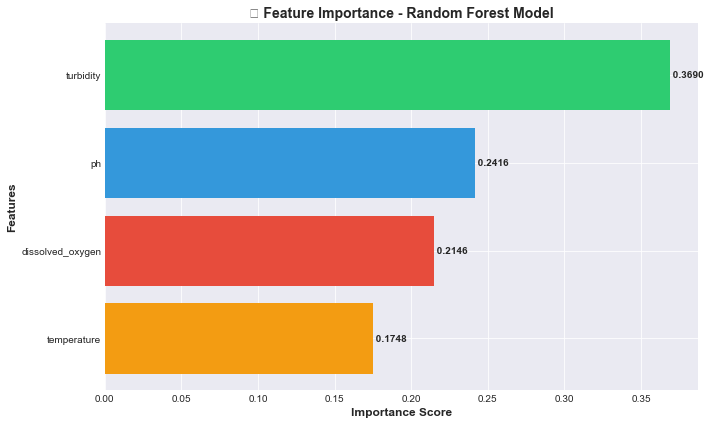


💡 Feature Importance menunjukkan kontribusi setiap parameter terhadap prediksi


In [21]:
# Feature Importance
print("🎯 Feature Importance Analysis")
print("=" * 60)

feature_importance = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(feature_importance_df.to_string(index=False))
print("=" * 60)

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors_imp = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors_imp)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('📊 Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, importance) in enumerate(zip(bars, feature_importance_df['Importance'])):
    plt.text(importance, bar.get_y() + bar.get_height()/2, 
             f' {importance:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Feature Importance menunjukkan kontribusi setiap parameter terhadap prediksi")


🔄 Cross-Validation Analysis
📊 5-Fold Cross-Validation Scores:
   Fold 1: 91.88%
   Fold 2: 90.62%
   Fold 3: 91.25%
   Fold 4: 91.25%
   Fold 5: 90.62%

📈 Mean CV Score: 91.13% (+/- 0.47%)


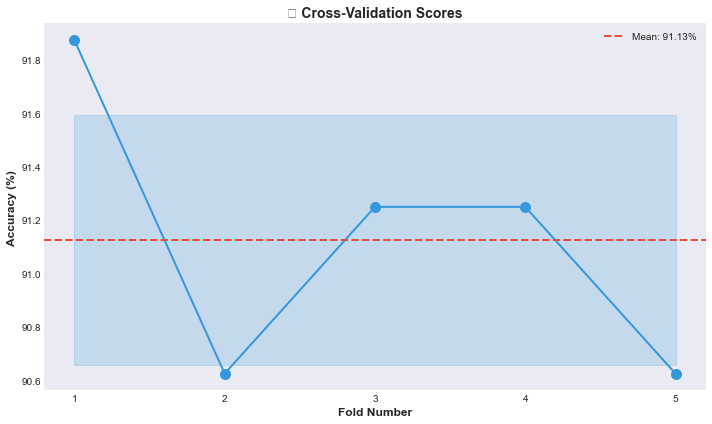

In [22]:
# Cross-validation scores
from sklearn.model_selection import cross_val_score


print("🔄 Cross-Validation Analysis")
print("=" * 60)

cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("📊 5-Fold Cross-Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"   Fold {i}: {score*100:.2f}%")

print(f"\n📈 Mean CV Score: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")
print("=" * 60)

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores * 100, marker='o', linestyle='-', linewidth=2, markersize=10, color='#3498db')
plt.axhline(y=cv_scores.mean() * 100, color='#e74c3c', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean()*100:.2f}%')
plt.fill_between(range(1, 6), 
                  (cv_scores.mean() - cv_scores.std()) * 100,
                  (cv_scores.mean() + cv_scores.std()) * 100,
                  alpha=0.2, color='#3498db')
plt.xlabel('Fold Number', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('📊 Cross-Validation Scores', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 8. Save Trained Model


In [24]:
# Create trained models directory if not exists
import os

models_dir = 'models/trained'
os.makedirs(models_dir, exist_ok=True)

print("💾 Saving Trained Model and Components")
print("=" * 60)

# Prepare model metadata
model_metadata = {
    'model_type': 'RandomForestClassifier',
    'feature_names': feature_names,
    'label_mapping': label_mapping,
    'label_encoding': label_encoding,
    'best_params': best_params,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'accuracy': float(final_accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'cv_mean_score': float(cv_scores.mean()),
    'cv_std_score': float(cv_scores.std()),
    'feature_importance': {name: float(imp) for name, imp in zip(feature_names, feature_importance)},
    'n_samples_train': len(X_train),
    'n_samples_test': len(X_test),
    'n_features': len(feature_names),
    'n_classes': len(label_mapping)
}

# Save files
model_path = os.path.join(models_dir, 'water_quality_rf_model.pkl')
scaler_path = os.path.join(models_dir, 'scaler.pkl')
metadata_path = os.path.join(models_dir, 'model_metadata.pkl')

# Save model
joblib.dump(best_rf_model, model_path)
print(f"✅ Model saved: {model_path}")

# Save scaler
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved: {scaler_path}")

# Save metadata
joblib.dump(model_metadata, metadata_path)
print(f"✅ Metadata saved: {metadata_path}")

print("\n" + "=" * 60)
print("🎉 All components saved successfully!")
print("=" * 60)


💾 Saving Trained Model and Components
✅ Model saved: models/trained\water_quality_rf_model.pkl
✅ Scaler saved: models/trained\scaler.pkl
✅ Metadata saved: models/trained\model_metadata.pkl

🎉 All components saved successfully!


## 9. Generate Description Function for Fish Condition


In [25]:
def generate_water_quality_description(quality_class, ph, temperature, turbidity, dissolved_oxygen):
    """
    Generate detailed description about fish condition based on water quality parameters.
    
    Args:
        quality_class (str): Predicted water quality class ('Baik', 'Normal', 'Perlu Perhatian')
        ph (float): pH level
        temperature (float): Temperature in Celsius
        turbidity (float): Turbidity in NTU
        dissolved_oxygen (float): Dissolved oxygen in mg/L
    
    Returns:
        dict: Detailed description and recommendations
    """
    
    # Ideal ranges for Tilapia (Ikan Nila)
    IDEAL_PH_MIN, IDEAL_PH_MAX = 6.5, 8.5
    IDEAL_TEMP_MIN, IDEAL_TEMP_MAX = 25, 30
    IDEAL_TURBIDITY_MAX = 25  # NTU
    IDEAL_DO_MIN = 5.0  # mg/L
    
    # Initialize description components
    issues = []
    recommendations = []
    fish_condition = ""
    
    # Check pH
    if ph < 6.0:
        issues.append("pH terlalu rendah (asam)")
        recommendations.append("Tambahkan kapur pertanian untuk menaikkan pH")
    elif ph > 9.0:
        issues.append("pH terlalu tinggi (basa)")
        recommendations.append("Lakukan pergantian air secara bertahap")
    elif ph < IDEAL_PH_MIN or ph > IDEAL_PH_MAX:
        issues.append("pH di luar rentang optimal")
        recommendations.append("Monitor pH secara rutin dan lakukan penyesuaian bertahap")
    
    # Check Temperature
    if temperature < 20:
        issues.append("suhu terlalu rendah")
        recommendations.append("Pertimbangkan penggunaan pemanas air atau greenhouse")
    elif temperature > 32:
        issues.append("suhu terlalu tinggi")
        recommendations.append("Tingkatkan aerasi dan pertimbangkan peneduh kolam")
    elif temperature < IDEAL_TEMP_MIN or temperature > IDEAL_TEMP_MAX:
        issues.append("suhu di luar rentang optimal")
        recommendations.append("Monitor suhu dan sesuaikan dengan kondisi lingkungan")
    
    # Check Turbidity
    if turbidity > 50:
        issues.append("kekeruhan sangat tinggi")
        recommendations.append("Kurangi pemberian pakan dan tingkatkan filtrasi air")
    elif turbidity > IDEAL_TURBIDITY_MAX:
        issues.append("kekeruhan cukup tinggi")
        recommendations.append("Lakukan penggantian air parsial dan periksa sistem filtrasi")
    
    # Check Dissolved Oxygen
    if dissolved_oxygen < 3.0:
        issues.append("oksigen terlarut sangat rendah (berbahaya)")
        recommendations.append("SEGERA tingkatkan aerasi dan kurangi kepadatan ikan")
    elif dissolved_oxygen < IDEAL_DO_MIN:
        issues.append("oksigen terlarut di bawah ideal")
        recommendations.append("Tingkatkan aerasi dengan aerator atau kincir air")
    
    # Generate description based on quality class
    if quality_class == 'Baik':
        fish_condition = (
            f"Kualitas air dalam kondisi OPTIMAL untuk budidaya ikan nila. "
            f"Parameter pH ({ph:.2f}), suhu ({temperature:.1f}°C), kekeruhan ({turbidity:.1f} NTU), "
            f"dan oksigen terlarut ({dissolved_oxygen:.2f} mg/L) berada dalam rentang ideal. "
            f"Ikan nila dapat tumbuh dengan sehat, memiliki nafsu makan yang baik, dan sistem imun yang kuat. "
            f"Pertumbuhan ikan optimal dengan tingkat stres minimal."
        )
        if not recommendations:
            recommendations.append("Pertahankan kualitas air saat ini")
            recommendations.append("Lakukan monitoring rutin setiap hari")
            recommendations.append("Berikan pakan berkualitas sesuai jadwal")
    
    elif quality_class == 'Normal':
        fish_condition = (
            f"Kualitas air dalam kondisi CUKUP BAIK untuk budidaya ikan nila. "
            f"Terdapat beberapa parameter yang perlu diperhatikan: {', '.join(issues) if issues else 'parameter masih dalam batas toleransi'}. "
            f"Ikan nila masih dapat bertahan dan tumbuh, namun mungkin mengalami sedikit stres. "
            f"Nafsu makan ikan bisa menurun dan pertumbuhan tidak seoptimal kondisi ideal. "
            f"Sistem kekebalan tubuh ikan mulai menurun, sehingga lebih rentan terhadap penyakit."
        )
        if not recommendations:
            recommendations.append("Monitor parameter air lebih sering (2-3x sehari)")
            recommendations.append("Siapkan rencana perbaikan kualitas air")
            recommendations.append("Kurangi pemberian pakan jika ikan terlihat lemas")
    
    else:  # Perlu Perhatian
        fish_condition = (
            f"Kualitas air dalam kondisi BURUK dan MEMERLUKAN TINDAKAN SEGERA! "
            f"Masalah yang terdeteksi: {', '.join(issues)}. "
            f"Dalam kondisi air seperti ini, ikan nila mengalami STRES BERAT dan kesehatan mereka terancam. "
            f"Ikan akan menunjukkan gejala: nafsu makan menurun drastis atau tidak mau makan, "
            f"bergerak lemah di permukaan air (gasping), warna tubuh memucat, "
            f"sangat rentan terhadap penyakit dan infeksi, pertumbuhan terhenti, "
            f"dan dapat menyebabkan KEMATIAN MASSAL jika tidak segera ditangani."
        )
        if not recommendations:
            recommendations.append("SEGERA lakukan pergantian air 30-50%")
            recommendations.append("Hentikan pemberian pakan sementara")
            recommendations.append("Tingkatkan aerasi secara maksimal")
        recommendations.append("Konsultasi dengan ahli budidaya ikan jika kondisi tidak membaik")
    
    return {
        'quality': quality_class,
        'description': fish_condition,
        'issues': issues if issues else ['Tidak ada masalah signifikan'],
        'recommendations': recommendations,
        'parameters': {
            'ph': ph,
            'temperature': temperature,
            'turbidity': turbidity,
            'dissolved_oxygen': dissolved_oxygen
        }
    }

print("✅ Function 'generate_water_quality_description' created successfully!")
print("\n📝 Function signature:")
print("   generate_water_quality_description(quality_class, ph, temperature, turbidity, dissolved_oxygen)")
print("\n💡 This function will be integrated into the ML service API")


✅ Function 'generate_water_quality_description' created successfully!

📝 Function signature:
   generate_water_quality_description(quality_class, ph, temperature, turbidity, dissolved_oxygen)

💡 This function will be integrated into the ML service API


In [26]:
def predict_water_quality(ph, temperature, turbidity, dissolved_oxygen, model, scaler, label_mapping):
    """
    Predict water quality and generate description
    
    Args:
        ph, temperature, turbidity, dissolved_oxygen: Water parameters
        model: Trained ML model
        scaler: Fitted StandardScaler
        label_mapping: Dictionary mapping numeric labels to text
    
    Returns:
        dict: Prediction results with description
    """
    # Prepare input
    input_data = np.array([[ph, temperature, turbidity, dissolved_oxygen]])
    
    # Scale input
    input_scaled = scaler.transform(input_data)
    
    # Predict
    prediction = model.predict(input_scaled)[0]
    prediction_proba = model.predict_proba(input_scaled)[0]
    
    # Get quality class
    quality_class = label_mapping[prediction]
    confidence = prediction_proba[prediction]
    
    # Generate description
    description_result = generate_water_quality_description(
        quality_class, ph, temperature, turbidity, dissolved_oxygen
    )
    
    # Add prediction info
    description_result['prediction_numeric'] = int(prediction)
    description_result['confidence'] = float(confidence)
    description_result['probabilities'] = {
        label_mapping[i]: float(prob) 
        for i, prob in enumerate(prediction_proba)
    }
    
    return description_result

print("✅ Function 'predict_water_quality' created successfully!")
print("\n📝 This function combines model prediction with descriptive analysis")


✅ Function 'predict_water_quality' created successfully!

📝 This function combines model prediction with descriptive analysis


In [27]:
# Test Case 1: Kondisi AIR BAIK (Optimal)
print("=" * 80)
print("🧪 TEST CASE 1: Kondisi Air BAIK (Optimal)")
print("=" * 80)

test_data_good = {
    'ph': 7.2,
    'temperature': 28.0,
    'turbidity': 15.0,
    'dissolved_oxygen': 6.5
}

result_good = predict_water_quality(
    test_data_good['ph'],
    test_data_good['temperature'],
    test_data_good['turbidity'],
    test_data_good['dissolved_oxygen'],
    best_rf_model,
    scaler,
    label_mapping
)

print(f"\n📊 Input Parameters:")
for param, value in test_data_good.items():
    print(f"   {param:20s}: {value}")

print(f"\n🎯 Prediction Results:")
print(f"   Quality:    {result_good['quality']}")
print(f"   Confidence: {result_good['confidence']*100:.2f}%")
print(f"\n📝 Description:")
print(f"   {result_good['description']}")
print(f"\n⚠️  Issues: {', '.join(result_good['issues'])}")
print(f"\n💡 Recommendations:")
for i, rec in enumerate(result_good['recommendations'], 1):
    print(f"   {i}. {rec}")
print(f"\n📈 Class Probabilities:")
for cls, prob in result_good['probabilities'].items():
    print(f"   {cls:20s}: {prob*100:6.2f}%")
print("=" * 80)


🧪 TEST CASE 1: Kondisi Air BAIK (Optimal)

📊 Input Parameters:
   ph                  : 7.2
   temperature         : 28.0
   turbidity           : 15.0
   dissolved_oxygen    : 6.5

🎯 Prediction Results:
   Quality:    Perlu Perhatian
   Confidence: 99.89%

📝 Description:
   Kualitas air dalam kondisi BURUK dan MEMERLUKAN TINDAKAN SEGERA! Masalah yang terdeteksi: . Dalam kondisi air seperti ini, ikan nila mengalami STRES BERAT dan kesehatan mereka terancam. Ikan akan menunjukkan gejala: nafsu makan menurun drastis atau tidak mau makan, bergerak lemah di permukaan air (gasping), warna tubuh memucat, sangat rentan terhadap penyakit dan infeksi, pertumbuhan terhenti, dan dapat menyebabkan KEMATIAN MASSAL jika tidak segera ditangani.

⚠️  Issues: Tidak ada masalah signifikan

💡 Recommendations:
   1. SEGERA lakukan pergantian air 30-50%
   2. Hentikan pemberian pakan sementara
   3. Tingkatkan aerasi secara maksimal
   4. Konsultasi dengan ahli budidaya ikan jika kondisi tidak membaik

📈 C

In [ ]:
# Test Case 2: Kondisi AIR NORMAL
print("\n" + "=" * 80)
print("🧪 TEST CASE 2: Kondisi Air NORMAL")
print("=" * 80)

test_data_normal = {
    'ph': 6.8,
    'temperature': 26.5,
    'turbidity': 28.0,
    'dissolved_oxygen': 4.8
}

result_normal = predict_water_quality(
    test_data_normal['ph'],
    test_data_normal['temperature'],
    test_data_normal['turbidity'],
    test_data_normal['dissolved_oxygen'],
    best_rf_model,
    scaler,
    label_mapping
)

print(f"\n📊 Input Parameters:")
for param, value in test_data_normal.items():
    print(f"   {param:20s}: {value}")

print(f"\n🎯 Prediction Results:")
print(f"   Quality:    {result_normal['quality']}")
print(f"   Confidence: {result_normal['confidence']*100:.2f}%")
print(f"\n📝 Description:")
print(f"   {result_normal['description']}")
print(f"\n⚠️  Issues: {', '.join(result_normal['issues'])}")
print(f"\n💡 Recommendations:")
for i, rec in enumerate(result_normal['recommendations'], 1):
    print(f"   {i}. {rec}")
print(f"\n📈 Class Probabilities:")
for cls, prob in result_normal['probabilities'].items():
    print(f"   {cls:20s}: {prob*100:6.2f}%")
print("=" * 80)


In [ ]:
# Test Case 3: Kondisi AIR PERLU PERHATIAN (Buruk)
print("\n" + "=" * 80)
print("🧪 TEST CASE 3: Kondisi Air PERLU PERHATIAN (Buruk)")
print("=" * 80)

test_data_bad = {
    'ph': 5.5,
    'temperature': 34.0,
    'turbidity': 55.0,
    'dissolved_oxygen': 2.5
}

result_bad = predict_water_quality(
    test_data_bad['ph'],
    test_data_bad['temperature'],
    test_data_bad['turbidity'],
    test_data_bad['dissolved_oxygen'],
    best_rf_model,
    scaler,
    label_mapping
)

print(f"\n📊 Input Parameters:")
for param, value in test_data_bad.items():
    print(f"   {param:20s}: {value}")

print(f"\n🎯 Prediction Results:")
print(f"   Quality:    {result_bad['quality']}")
print(f"   Confidence: {result_bad['confidence']*100:.2f}%")
print(f"\n📝 Description:")
print(f"   {result_bad['description']}")
print(f"\n⚠️  Issues: {', '.join(result_bad['issues'])}")
print(f"\n💡 Recommendations:")
for i, rec in enumerate(result_bad['recommendations'], 1):
    print(f"   {i}. {rec}")
print(f"\n📈 Class Probabilities:")
for cls, prob in result_bad['probabilities'].items():
    print(f"   {cls:20s}: {prob*100:6.2f}%")
print("=" * 80)


## 11. Model Summary & Next Steps


In [ ]:
print("=" * 80)
print("🎉 MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 80)

print("\n📊 FINAL MODEL SUMMARY:")
print("-" * 80)
print(f"Model Type:           Random Forest Classifier")
print(f"Number of Features:   {len(feature_names)}")
print(f"Features:             {', '.join(feature_names)}")
print(f"Number of Classes:    {len(label_mapping)}")
print(f"Classes:              {', '.join([v for k, v in sorted(label_mapping.items())])}")
print(f"\nTraining Samples:     {len(X_train):,}")
print(f"Testing Samples:      {len(X_test):,}")
print(f"\nAccuracy:             {final_accuracy*100:.2f}%")
print(f"Precision:            {precision*100:.2f}%")
print(f"Recall:               {recall*100:.2f}%")
print(f"F1-Score:             {f1*100:.2f}%")
print(f"CV Mean Score:        {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")
print("-" * 80)

print("\n🏆 BEST HYPERPARAMETERS:")
print("-" * 80)
for param, value in best_params.items():
    print(f"   {param:25s}: {value}")
print("-" * 80)

print("\n📁 SAVED FILES:")
print("-" * 80)
print(f"   ✓ Model:    {model_path}")
print(f"   ✓ Scaler:   {scaler_path}")
print(f"   ✓ Metadata: {metadata_path}")
print("-" * 80)

print("\n🔥 TOP 3 MOST IMPORTANT FEATURES:")
print("-" * 80)
for i, row in feature_importance_df.head(3).iterrows():
    print(f"   {i+1}. {row['Feature']:20s}: {row['Importance']:.4f}")
print("-" * 80)

print("\n📋 NEXT STEPS:")
print("-" * 80)
print("   1. ✅ Integrate trained model into Flask ML Service")
print("   2. ✅ Update predict.py to use the trained model")
print("   3. ✅ Test API endpoints with sample data")
print("   4. ✅ Connect ML Service with Express.js backend")
print("   5. ✅ Deploy to production environment")
print("-" * 80)

print("\n🚀 Ready for Integration!")
print("=" * 80)
